# Νευρωνικά Δίκτυα και Ευφυή Υπολογιστικά Συστήματα
# Άσκηση 1 : Επιβλεπόμενη Μάθηση
# Ομάδα 65 

> Αριστείδης Βασιλάκης 03116142

> Δημήτριος Μυλωνάκης 03115742

> Ευγένι Δούφας 03115728


# 1ο Μέρος


## Περιγραφή του Dataset

To dataset **S05** περιέχει 165 δείγματα που αφορούν περιπτώσεις ασθενών με ηπατοκυτταρικό καρκίνωμα (HCC). Kάθε δείγμα περιέχει τιμές που αντιστοιχούν σε **49 χαρακτηριστικά** (attributes) και τέλος κατηγοποιείται σε κατηγορία σε ανάλογα με την επιβίωση του ασθενούς σε διάστημα ένος χρόνου. Στην 50η (η οποία είναι η τελευταία) τιμη συμβολίζεται με *1* αν επιβίωσε ο ασθενης και με *0* αν όχι.

Σύμφωνα με τη περγραφή του Dataset, μόνο 3 χαρακτηριστικά αναφέρονται ως διατεταγμένα (ordinal). Aυτά έιναι τα "Performance Status", "Encephalopathy Degree" και "Ascites Degree" τα οποία αντιστοιχόυν στις κολόνες 26, 27 και 28. Δεν υπάρχουν επικεφαλίδες στο Dataset αλλά αναφέρονται οι τίτλοι των χαρακτηριστικών στο κέιμενο περιγραφής του ενώ επίσης δεν υπάρχει αρίθμηση των γραμμών.



##Προετοιμασία και αλλαγές στο Dataset

Όποιες αλλαγές χρειάστηκε να γίνουν πραγματοποιούνται με κώδικα εδω. Αρχικά, χρειάστηκε να αλλαχθεί ο συμβολισμός των απουσιάζουσων τιμων απο *?* σε *ΝaN* διότι έπρεπε να εντοπίζονται σωστά απο τα εργαλεία που χρησιμοποιήθηκαν αργότερα για να τις συμπληρώσουν.

Σύμφωνα με τη περιγραφή του Dataset, μόνο περίπου 8 δείγματα έχουν συμπληρωμένες τιμές για όλα τα χαρακτηριστικά τους και οι απουσιάζουσες τιμές αντιπροσωπεύουν περίπου 10% του συνόλου αυτών. Επιπλέον χρειάστηκε να γίνει κανονικόποιηση στα δεδομένα του dataset και έγιναν δοκιμές με διαφορετικές στρατηγικές για κάθε ταξινομητή που έδωσαν διαφορετικά αποτελέσματα που παρουσιάζονται παρακάτω. Το ίδιο έγινε βέβαια και για τη στρατηγική συμπλήρωσης των κενών. 

To dataset δεν είναι ισορροοπημένο καθώς οι συνολικές περιπτώσεις θανόντων αντιστοιχόυν στο 35% του συνόλου. Γι' αυτό το λόγο χρησιμοποιήθηκαν στρατηγικές εξισορρόπησης τους.

Αξίζει επίσης να σημειωθεί ότι αποφασίστηκε να μην γίνει απόπειρα μέιωσης της διαστατικότητας καθώς σε ένα μικρό dataset όπως αυτό πιθανότατα δεν θα επέφερε αξιοσημείωτο όφελος.

##Αρχικά γίνεται upload του Dataset και μετρατροπή των *?* σε *NaN*

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("hcc-data.txt", header=None)
df.replace('?',np.NaN,inplace=True)

Saving hcc-data.txt to hcc-data (3).txt


##Συμπλήρωση κενών τιμών πριν γίνει ο διαχωρισμός σε σύνολα Train και Test

Οι στρατηγικές που έχει νόημα να συγκριθούν είναι οι εξής:

1.   Συμπλήρωση με τη πιο σύνηθη τιμή στη κάθε κολόνα.
2.   Συμπλήρωση με το μέσο όρο των τιμών στη κάθε κολόνα.
3.   Συμπλήρωση με το διάμεσο των τιμών στην κάθε κολόνα.

Για πεδία που παίρνουν τιμές *0* ή *1* οι στρατηγικές 1 και 3 είναι ισοδύναμες. Αυτά αντιστοιχούν περίπου στις μισές τιμές του dataset.

Θα γινει αρχικά δοκιμή και με τις τρείς στρατηγικές για όλα τα χαρακτηριστικά των δειγμάτων.

In [ ]:
from sklearn.impute import SimpleImputer

impmean=SimpleImputer(missing_values=np.NaN,strategy='mean')
impfreq=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
impmedian=SimpleImputer(missing_values=np.NaN,strategy='median')

idfmean=pd.DataFrame(impmean.fit_transform(df))
idffreq=pd.DataFrame(impfreq.fit_transform(df))
idfmedian=pd.DataFrame(impmedian.fit_transform(df))

##Διαχωρισμός 80-20 σε Train και Test sets

In [ ]:
trainmean, testmean = np.split(idfmean, [int(.8*len(idfmean))])
trainfreq, testfreq = np.split(idffreq, [int(.8*len(idffreq))])
trainmedian, testmedian = np.split(idfmedian, [int(.8*len(idfmedian))])

##Κανονικοποίηση του συνόλου Train και του Test (με τις παράμετρους του train)

Θα δοκιμασθούν οι στρατηγικές Standardization και min-max.


Κανονικοποιόυμε με τις μεθόδους minmax και z-score τα δεδομένα εκπαίδευσης και τα δεδομένα δοκιμής (σύμφωνα με τις παραμέτρους όμως που βρέθηκαν για τα δεδομένα εκπάιδευσης). Έφοσον προηγούμενως έιχαμε 3 περιπτώσεις (μια για κάθε μέθοδο συμπλήρωσης των κενών τιμών), θα πάρουμε τώρα 6 διαφορετικές περιπτώσεις για να δοκιμάσουμε.

In [ ]:
from sklearn import preprocessing

trainmeanattr, trainmeanlabels = np.hsplit(trainmean.values, [49])
scaledmeantrainattr = preprocessing.scale(trainmeanattr)
scaledmeantrain = np.hstack((scaledmeantrainattr, trainmeanlabels))

trainmedianattr, trainmedianlabels = np.hsplit(trainmedian.values, [49])
scaledmediantrainattr = preprocessing.scale(trainmedianattr)
scaledmediantrain = np.hstack((scaledmediantrainattr, trainmedianlabels))

trainfreqattr, trainfreqlabels = np.hsplit(trainfreq.values, [49])
scaledfreqtrainattr = preprocessing.scale(trainfreqattr)
scaledfreqtrain = np.hstack((scaledfreqtrainattr, trainfreqlabels))

trainmeanattr, trainmeanlabels = np.hsplit(trainmean.values, [49])
minmaxmeantrainattr = preprocessing.minmax_scale(trainmeanattr)
minmaxmeantrain = np.hstack((minmaxmeantrainattr, trainmeanlabels))

trainmedianattr, trainmedianlabels = np.hsplit(trainmedian.values, [49])
minmaxmediantrainattr = preprocessing.minmax_scale(trainmedianattr)
minmaxmediantrain = np.hstack((minmaxmediantrainattr, trainmedianlabels))

trainfreqattr, trainfreqlabels = np.hsplit(trainfreq.values, [49])
minmaxfreqtrainattr = preprocessing.minmax_scale(trainfreqattr)
minmaxfreqtrain = np.hstack((minmaxfreqtrainattr, trainfreqlabels))

In [ ]:
meanscaler = preprocessing.StandardScaler().fit(trainmeanattr)
testmeanattr, testmeanlabels = np.hsplit(testmean.values, [49])
scaledmeantestattr = meanscaler.transform(testmeanattr)
scaledmeantest = np.hstack((scaledmeantestattr, testmeanlabels))

freqscaler = preprocessing.StandardScaler().fit(trainfreqattr)
testfreqattr, testfreqlabels = np.hsplit(testfreq.values, [49])
scaledfreqtestattr = freqscaler.transform(testfreqattr)
scaledfreqtest = np.hstack((scaledfreqtestattr, testfreqlabels))

medianscaler = preprocessing.StandardScaler().fit(trainmedianattr)
testmedianattr, testmedianlabels = np.hsplit(testmedian.values, [49])
scaledmediantestattr = medianscaler.transform(testmedianattr)
scaledmediantest = np.hstack((scaledmediantestattr, testmedianlabels))

meanscaler = preprocessing.MinMaxScaler().fit(trainmeanattr)
testmeanattr, testmeanlabels = np.hsplit(testmean.values, [49])
minmaxmeantestattr = meanscaler.transform(testmeanattr)
minmaxmeantest = np.hstack((minmaxmeantestattr, testmeanlabels))

freqscaler = preprocessing.MinMaxScaler().fit(trainfreqattr)
testfreqattr, testfreqlabels = np.hsplit(testfreq.values, [49])
minmaxfreqtestattr = freqscaler.transform(testfreqattr)
minmaxfreqtest = np.hstack((minmaxfreqtestattr, testfreqlabels))

medianscaler = preprocessing.MinMaxScaler().fit(trainmedianattr)
testmedianattr, testmedianlabels = np.hsplit(testmedian.values, [49])
minmaxmediantestattr = medianscaler.transform(testmedianattr)
minmaxmediantest = np.hstack((minmaxmediantestattr, testmedianlabels))

##Εξισορρόπηση των δεδομένων εκπαίδευσης

Η μέθοδος που θα ακολουθηθεί αντιγράφει και προσθέτει τυχαία δείγματα της κλάσης με τα λιγότερα δείγματα στο σύνολο των δειγμάτων εκπαίδευσης για τις 6 περιπτώσεις προς δοκιμή.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

scaledmeantrainattr, scaledmeantrainlabels = np.hsplit(scaledmeantrain, [49])
balscaledmeantrainattr, balscaledmeantrainlabels = ros.fit_sample(scaledmeantrainattr, scaledmeantrainlabels.astype(int).ravel())

scaledmediantrainattr, scaledmediantrainlabels = np.hsplit(scaledmediantrain, [49])
balscaledmediantrainattr, balscaledmediantrainlabels = ros.fit_sample(scaledmediantrainattr, scaledmediantrainlabels.astype(int).ravel())

scaledfreqtrainattr, scaledfreqtrainlabels = np.hsplit(scaledfreqtrain, [49])
balscaledfreqtrainattr, balscaledfreqtrainlabels = ros.fit_sample(scaledfreqtrainattr, scaledfreqtrainlabels.astype(int).ravel())

minmaxfreqtrainattr, minmaxfreqtrainlabels = np.hsplit(minmaxfreqtrain, [49])
balminmaxfreqtrainattr, balminmaxfreqtrainlabels = ros.fit_sample(minmaxfreqtrainattr, minmaxfreqtrainlabels.astype(int).ravel())

minmaxmeantrainattr, minmaxmeantrainlabels = np.hsplit(minmaxmeantrain, [49])
balminmaxmeantrainattr, balminmaxmeantrainlabels = ros.fit_sample(minmaxmeantrainattr, minmaxmeantrainlabels.astype(int).ravel())

minmaxmediantrainattr, minmaxmediantrainlabels = np.hsplit(minmaxmediantrain, [49])
balminmaxmediantrainattr, balminmaxmediantrainlabels = ros.fit_sample(minmaxmediantrainattr, minmaxmediantrainlabels.astype(int).ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

##Classifiers


###Dummy Classifier

Θα γίνει δοκιμή του dummy classifier με τη μέθοδο uniform. Aυτός ο ταξινομητής θα αναθέτει τυχαίες τιμές για τις ετικέτες των δειγμάτων του test set οπότε αναμένεται οι μισές απο αυτές να είναι και ορθές. Μιας και δεν λαμβάνει υπ'όψην του τα χαρακτηριστικά του κάθε δείγματος, δεν έχει νόημα να ασχοληθεί κανείς με τις εξι διαφορετικές περιπτώσεις για αυτά που προέκυψαν παραπάνω αλλά θα επιλέξουμε μια από αυτές και θα σημειώσουμε την απόδοση της με αυτόν τον ταξινομητή για να υπάρχει σαν σημείο αναφοράς. Επίσης, εφόσον υπάρχει ισορροπία στις κλάσεις των δειγμάτων του συνόλου train δεν έχει ούτε νόημα να δοκιμαστούν άλλες στρατηγικές του dummy όπως stratified, most_frequent και constant καθώς θα δώσουν όμοια αποτελέσματα.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import time

dc_uniform = DummyClassifier(strategy="uniform")

a=time.time()
model = dc_uniform.fit(balscaledmeantrainattr, balscaledmeantrainlabels)
b=time.time()
dummytime=b-a

preds = dc_uniform.predict(scaledmeantestattr)
print("Με μέθοδο uniform παίρνουμε accuracy score:")
print(dc_uniform.score(scaledmeantestattr, testmeanlabels), '\n')
print("Confusion Matrix:")
print(confusion_matrix(testmeanlabels, preds), '\n')
print("f1_micro score:")
f1microdum=precision_recall_fscore_support(testmeanlabels, preds, average='micro')
print(f1microdum, "\n")
print("f1_macro score:")
f1macrodum=precision_recall_fscore_support(testmeanlabels, preds, average='macro')
print(f1macrodum, "\n")

Με μέθοδο uniform παίρνουμε accuracy score:
0.42424242424242425 

Confusion Matrix:
[[ 5  7]
 [10 11]] 

f1_micro score:
(0.48484848484848486, 0.48484848484848486, 0.48484848484848486, None) 

f1_macro score:
(0.4722222222222222, 0.47023809523809523, 0.4672364672364673, None) 



###Gaussian Naive Bayes

Γίνεται δοκιμή για τις 6 διαφορετικές περιπτώσεις με gaussian naive bayes ταξινομητή. Κάθε μια απο αυτές θα αξιολογηθεί με τη μέθοδο τoυ 10 fold cross-validation χωρίς να εμπλακούν τα δείγματα στο σύνολο test ενώ στη συνέχεια για τη περίπτωση που απέδωσε καλύτερα κατά μεσο όρο στα scores του cross_validation θα πάρουμε τα confusion matrix, f1_micro και f1_macro score.

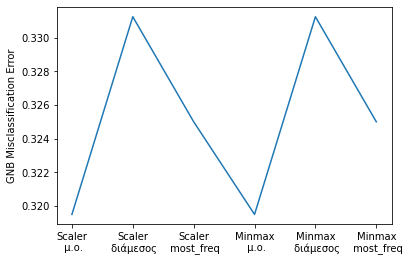

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
gnb = GaussianNB()
gnb_scores = []
gnb_choices = ["Scaler\n μ.ο.", "Scaler\n διάμεσος", "Scaler\n most_freq", "Minmax\n μ.ο.", "Minmax\n διάμεσος", "Minmax\n most_freq"]

gnb_scores.append(cross_val_score(gnb, balscaledmeantrainattr, balscaledmeantrainlabels, cv=10, scoring='accuracy').mean())
gnb_scores.append(cross_val_score(gnb, balscaledmediantrainattr, balscaledmediantrainlabels, cv=10, scoring='accuracy').mean())
gnb_scores.append(cross_val_score(gnb, balscaledfreqtrainattr, balscaledfreqtrainlabels, cv=10, scoring='accuracy').mean())
gnb_scores.append(cross_val_score(gnb, balminmaxmeantrainattr, balminmaxmeantrainlabels, cv=10, scoring='accuracy').mean())
gnb_scores.append(cross_val_score(gnb, balminmaxmediantrainattr, balminmaxmediantrainlabels, cv=10, scoring='accuracy').mean())
gnb_scores.append(cross_val_score(gnb, balminmaxfreqtrainattr, balminmaxfreqtrainlabels, cv=10, scoring='accuracy').mean())

import matplotlib.pyplot as plt

gnb_mean_error = [1 - x for x in gnb_scores]

plt.plot(gnb_choices, gnb_mean_error)
plt.ylabel('GNB Misclassification Error')
plt.show()


Από τα παραπάνω γίνεται αντιληπτό οτι παρόλο το γεγονός οτι η διαφορές ανάμεσα στην απόδοση των έξι περιπτώσεων είναι μικρές, καθοριστικό ρόλο παίζει ο τρόπος συμπλήρωσης των κενών τιμών (και όχι ο τρόπος κανονικοποίησης) με το σφάλμα με τη χρήση της μέσης τιμής να είναι το μικρότερο.

Θα γίνει τώρα άλλη μια σύγκριση μεταξύ της επίδοσης του gnb με ή χωρίς κανονικοποίηση και random οversampling επιλέγοντας ως βέλτιστη περίπτωση από τις 6 παραπάνω αυτήν με z_score κανονινκοποίηση (και συμπλήρωση τιμής με τον μέσο όρο της στήλης).

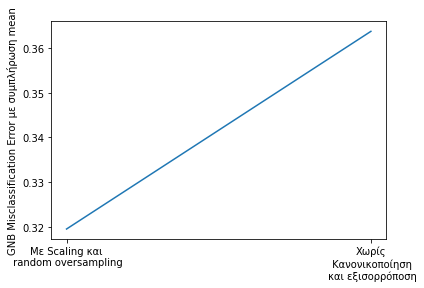

In [ ]:
gnb_scores.clear()
gnb_choices = ["Με Scaling και\n random oversampling", "Xωρίς\n Κανονικοποίηση\n και εξισορρόποση"]

gnb_scores.append(cross_val_score(gnb, balscaledmeantrainattr, balscaledmeantrainlabels, cv=10, scoring='accuracy').mean())
gnb_scores.append(cross_val_score(gnb, trainmeanattr, trainmeanlabels.astype(int).ravel(), cv=10, scoring='accuracy').mean())

gnb_mean_error = [1 - x for x in gnb_scores]

plt.plot(gnb_choices, gnb_mean_error)
plt.ylabel('GNB Misclassification Error με συμπλήρωση mean')
plt.show()

Γίνεται αντιληπτό από το παραπάνω ότι ο GNB ταξινομητής (μάλλον) αποδίδει βέλτιστα με συμπλήρωση των τιμών με το μέσο όρο της αντίστοιχης κολόνας, z_score κανονικόποιηση και random oversampling. Για αυτήν τη μέθοδο, θα υπολογιστούν παρακάτω τα confusion matrix, f1_macro & f1_micro.

In [ ]:
a=time.time()
model = gnb.fit(balscaledmeantrainattr, balscaledmeantrainlabels)
b=time.time()
gnbtime=b-a
preds = gnb.predict(scaledmeantestattr)

print("Παίρνουμε accuracy score:")
print(gnb.score(scaledmeantestattr, testmeanlabels), '\n')
print("Confusion Matrix:")
print(confusion_matrix(testmeanlabels, preds), '\n')
print("f1_micro score:")
f1micrognb=precision_recall_fscore_support(testmeanlabels, preds, average='micro')
print(f1micrognb, "\n")
print("f1_macro score:")
f1macrognb=precision_recall_fscore_support(testmeanlabels, preds, average='micro')
print(f1macrognb, "\n")

Παίρνουμε accuracy score:
0.6363636363636364 

Confusion Matrix:
[[ 5  7]
 [ 5 16]] 

f1_micro score:
(0.6363636363636364, 0.6363636363636364, 0.6363636363636364, None) 

f1_macro score:
(0.6363636363636364, 0.6363636363636364, 0.6363636363636364, None) 



###kNN Classifier

Για τα 6 train dataset-περιπτώσεις που έχουμε, θα γινει αξιολόγηση του για τα διάφορα k του knn (με cross-validation 10 fold) και έπειτα θα επιλεγεί ο καλύτερος συνδυασμός dataset και αριθμού k.

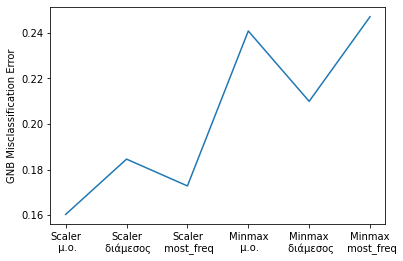

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

myList = list(range(1,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))
cv_scores = []
method_scores = []
bestn=[]

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, balscaledmeantrainattr, balscaledmeantrainlabels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

method_scores.append(max(cv_scores))
bestn.append(cv_scores.index(max(cv_scores))+1)
cv_scores.clear()

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, balscaledmediantrainattr, balscaledmediantrainlabels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

method_scores.append(max(cv_scores))
bestn.append(cv_scores.index(max(cv_scores))+1)
cv_scores.clear()

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,balscaledfreqtrainattr, balscaledfreqtrainlabels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

method_scores.append(max(cv_scores))
bestn.append(cv_scores.index(max(cv_scores))+1)
cv_scores.clear()

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, balminmaxfreqtrainattr, balminmaxfreqtrainlabels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

method_scores.append(max(cv_scores))
bestn.append(cv_scores.index(max(cv_scores))+1)
cv_scores.clear()

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, balminmaxmeantrainattr, balminmaxmeantrainlabels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

method_scores.append(max(cv_scores))
bestn.append(cv_scores.index(max(cv_scores))+1)
cv_scores.clear()

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, balminmaxmediantrainattr, balminmaxmediantrainlabels, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

method_scores.append(max(cv_scores))
bestn.append(cv_scores.index(max(cv_scores))+1)
cv_scores.clear()

knn_choices = ["Scaler\n μ.ο.", "Scaler\n διάμεσος", "Scaler\n most_freq", "Minmax\n μ.ο.", "Minmax\n διάμεσος", "Minmax\n most_freq"]

knn_mean_error = [1 - x for x in method_scores]

plt.plot(knn_choices, knn_mean_error)
plt.ylabel('GNB Misclassification Error')
plt.show()

Γίνεται αντιληπτό ότι καλύτερη απόδοση με τη μέθοδο cross-validation παίρνουμε με κανονικοποίηση z-score και συμπλήρωση με τη μέση τιμή της στήλης στις απουσιάζουσες τιμές.
 
H τιμή του k για αυτή τη περίπτωση είναι η εξής.

In [ ]:
print("best k value for scaler, mean method is:", bestn[0])

best k value for scaler, mean method is: 1


Θα γίνει τώρα άλλη μια σύγκριση τη επίδοσης του ταξινομητή knn (k=1) σε dataset με z-score, συμπλήρωση με μ.ο. και random oversampling με dataset μόνο με συμπλήρωση μ.ο.

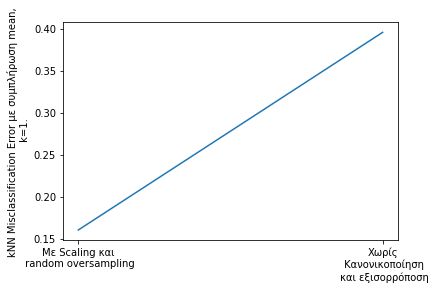

In [ ]:
method_scores.clear()
knn_choices = ["Με Scaling και\n random oversampling", "Xωρίς\n Κανονικοποίηση\n και εξισορρόποση"]
knn = KNeighborsClassifier(n_neighbors=1)

method_scores.append(cross_val_score(knn, balscaledmeantrainattr, balscaledmeantrainlabels, cv=10, scoring='accuracy').mean())
method_scores.append(cross_val_score(knn, trainmeanattr, trainmeanlabels.astype(int).ravel(), cv=10, scoring='accuracy').mean())

knn_mean_error = [1 - x for x in method_scores]

plt.plot(knn_choices, knn_mean_error)
plt.ylabel('kNN Misclassification Error με συμπλήρωση mean,\n k=1.')
plt.show()

Γίνεται αντιληπτό ότι η καλύτερη απόδοση με kNN ταξινομητή επιτυγχάνεται με z-score scaling, random oversampling και στην αρχή συμπλήρωση των κενών τιμών με το μέσο όρο της στήλης που αντιστοιχεί η τιμή. Θα βρεθούν τώρα τα confusion matrix, f1_micro και f1_macro scores.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
a=time.time()
model = knn.fit(balscaledmeantrainattr, balscaledmeantrainlabels)
b=time.time()
knntime=b-a
preds = knn.predict(scaledmeantestattr)

print("Παίρνουμε accuracy score:")
print(knn.score(scaledmeantestattr, testmeanlabels), '\n')
print("Confusion Matrix:")
print(confusion_matrix(testmeanlabels, preds), '\n')
print("f1_micro score:")
f1microknn=precision_recall_fscore_support(testmeanlabels, preds, average='micro')
print(f1microknn, "\n")
print("f1_macro score:")
f1macroknn=precision_recall_fscore_support(testmeanlabels, preds, average='macro')
print(f1macroknn, "\n")

Παίρνουμε accuracy score:
0.6666666666666666 

Confusion Matrix:
[[ 6  6]
 [ 5 16]] 

f1_micro score:
(0.6666666666666666, 0.6666666666666666, 0.6666666666666666, None) 

f1_macro score:
(0.6363636363636364, 0.6309523809523809, 0.6329625884732053, None) 



Tελικά, το καλύτερο αποτέλεσμα παίρνουμε με τον ταξινομητή knn για k=1 και με το dataset να είναι randomly oversampled, z-score scaled και με συμπλήρωση με το μέσο όρο της στήλης. Η διαφορά όμως με τα αποτελέσματα με που παίρνουμε με gnb με τους ίδιους όρους για το dataset είναι μικρή.

Είναι αλήθεια επίσης οτι η διαφορά στην πιστότητα των προβλέψεων που παίρνουμε στις δοκιμές με cross_validation και στις προβλέψεις του test set είναι αρκετά μεγάλη όπως φαίνεται παραπάνω. Για αυτό το φαινόμενο αυτή τη στιγμή δε μπορεί να δοθεί άλλη εξήγηση πέρα απο το παράγοντα τύχης σε ένα test dataset με τόσα λίγα δειγματα που μάλλον δεν μπορεί να μας δώσει σωστά συμπεράσματα.

Κατά την αξιολόγηση των μεθόδων με gnb και kNN ταξινομητές έγινε επίσης σιωπηλά η υπόθεση οτι οι μετατροπές στο dataset που κάνουμε έχουν πάντα θετικό απoτέλεσμα και δεν είναι πιθανό να έχουν αρνητικό. Οπότε και εμείς αξιολογούσαμε πχ τη διαφορά μεταξύ του dataset χωρίς καμμία μετατροπή σε σχέση με ολες.  Είναι κατανοητό ότι αυτή η υπόθεση δεν είναι ανάγκη να είναι αλήθεια αλλά έγινε για λόγους απλούστευσης για τις περιορισμένες ανάγκες αυτής της άσκησης εφόσον οι μεθόδοι που χρησιμοποιήθηκαν ήταν αρκετά απλές και είναι σχετικά προφανές οτι θα έχουν θετικό αποτέλεσμα (κανονικοποιήση , εξισορρόπηση). 

Ενδεικτικά παρακάτω τυπώνονται τα plots του f1_micro, f1_macro χρησιμοποιώντας τις βέλτιστες μεθόδους από όλους τους classifiers

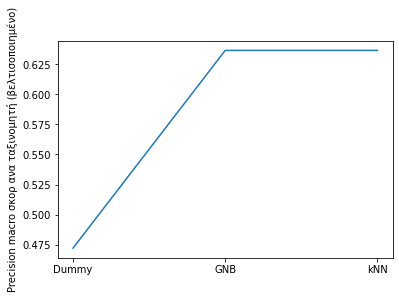

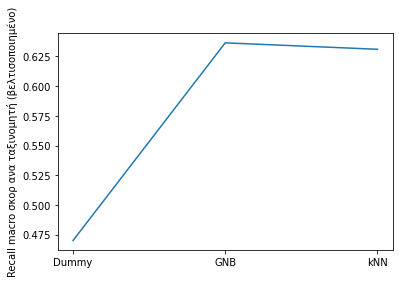

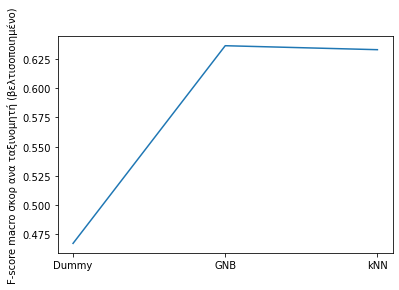

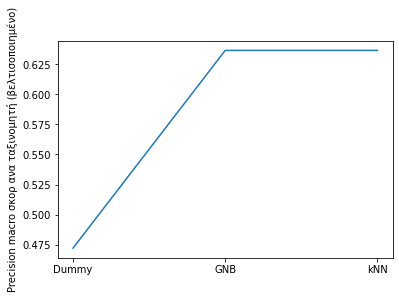

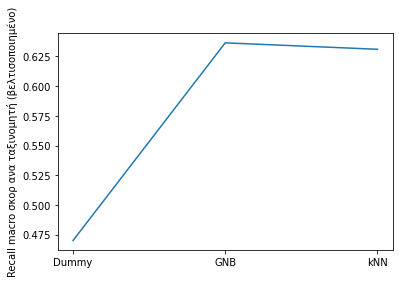

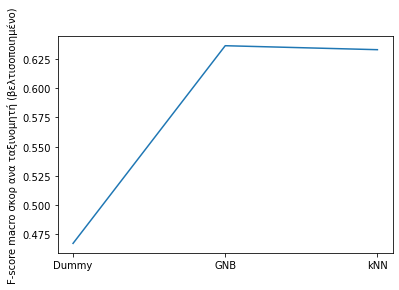

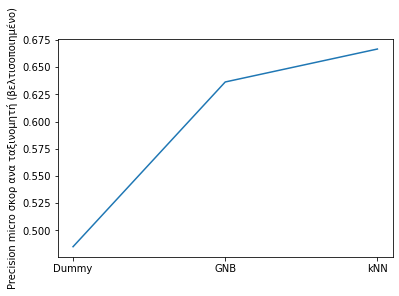

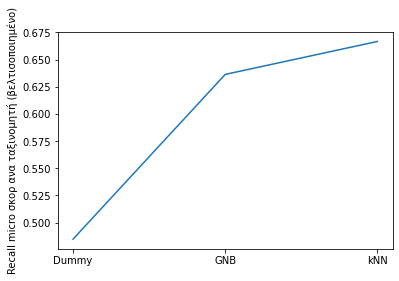

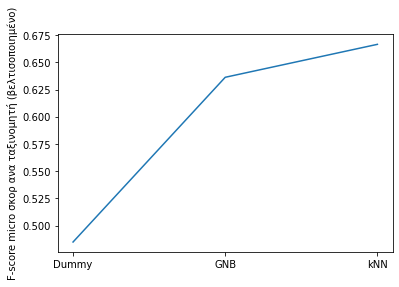

In [ ]:
f1macroall=[f1macrodum[0], f1macrognb[0], f1macroknn[0]]
f1macrochoices=["Dummy", "GNB", "kNN"]

plt.plot(f1macrochoices, f1macroall)
plt.ylabel('Precision macro σκορ ανα ταξινομητή (βελτισοποιημένο)')
plt.show()

f1macroall=[f1macrodum[1], f1macrognb[1], f1macroknn[1]]
f1macrochoices=["Dummy", "GNB", "kNN"]

plt.plot(f1macrochoices, f1macroall)
plt.ylabel('Recall macro σκορ ανα ταξινομητή (βελτισοποιημένο)')
plt.show()

f1macroall=[f1macrodum[2], f1macrognb[2], f1macroknn[2]]
f1macrochoices=["Dummy", "GNB", "kNN"]

plt.plot(f1macrochoices, f1macroall)
plt.ylabel('F-score macro σκορ ανα ταξινομητή (βελτισοποιημένο)')
plt.show()

f1macroall=[f1macrodum[0], f1macrognb[0], f1macroknn[0]]
f1macrochoices=["Dummy", "GNB", "kNN"]

plt.plot(f1macrochoices, f1macroall)
plt.ylabel('Precision macro σκορ ανα ταξινομητή (βελτισοποιημένο)')
plt.show()

f1macroall=[f1macrodum[1], f1macrognb[1], f1macroknn[1]]
f1macrochoices=["Dummy", "GNB", "kNN"]

plt.plot(f1macrochoices, f1macroall)
plt.ylabel('Recall macro σκορ ανα ταξινομητή (βελτισοποιημένο)')
plt.show()

f1macroall=[f1macrodum[2], f1macrognb[2], f1macroknn[2]]
f1macrochoices=["Dummy", "GNB", "kNN"]

plt.plot(f1macrochoices, f1macroall)
plt.ylabel('F-score macro σκορ ανα ταξινομητή (βελτισοποιημένο)')
plt.show()

f1microall=[f1microdum[0], f1micrognb[0], f1microknn[0]]
f1microchoices=["Dummy", "GNB", "kNN"]

plt.plot(f1microchoices, f1microall)
plt.ylabel('Precision micro σκορ ανα ταξινομητή (βελτισοποιημένο)')
plt.show()

f1microall=[f1microdum[1], f1micrognb[1], f1microknn[1]]
f1microchoices=["Dummy", "GNB", "kNN"]

plt.plot(f1microchoices, f1microall)
plt.ylabel('Recall micro σκορ ανα ταξινομητή (βελτισοποιημένο)')
plt.show()

f1microall=[f1microdum[2], f1micrognb[2], f1microknn[2]]
f1microchoices=["Dummy", "GNB", "kNN"]

plt.plot(f1microchoices, f1microall)
plt.ylabel('F-score micro σκορ ανα ταξινομητή (βελτισοποιημένο)')
plt.show()

Στα παραπάνω plot αποτυπώνεται ακριβώς που είδαμε και στα confusion matrix. Δηλαδή όλοι οι ταξινομητές (πέρα απο τον dummy) έχουν μεγαλύτερη επιτυχία στο να αναγνωρίζουν σωστά δείγματα της κλάσης με τα περισσότερα (διαφορετικά) δείγματα.

Tέλος θα γίνει μια σύγκριση των χρόνων εκτέλεσης στο fit κάθε ταξινομητή.

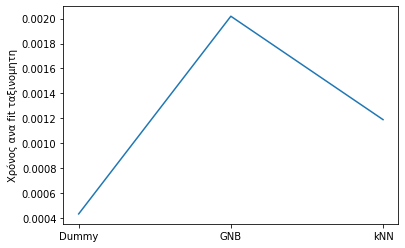

In [ ]:
timeall=[dummytime, gnbtime, knntime]
timechoices=["Dummy", "GNB", "kNN"]

plt.plot(timechoices, timeall)
plt.ylabel('Xρόνος ανα fit ταξινομητη')
plt.show()

Φαίνεται πως ο GNB σπαταλάει συγκριτικά αρκετά περισσότερο απο τον kNN

# Μέρος 2

## Περιγραφή του Dataset

To dataset **B07** ασχολείται με την πρόβλεψη πτώχευσης πολωνικών εταιρειών. Οι μετρήσεις έγιναν την περίοδο 2000-2012. Τα δεδομένα δίνονται σε 5 αρχεία arff, συνολικά λαμβάνουμε 43405 μετρήσεις, κάθε μία από τις οποίες έχει 64 attributes και στο 65ο υπάρχει το class, 0 αν η εταιρεία δεν χρεοκόπησε, 1 ειδάλως. Έχουμε δηλαδή ένα binary dataset.

## Είσοδος δεδομένων και προεπεξεργασία στο συνολικό dataset.

Αρχικά έγινε συνένωση των 5 αρχείων σε ένα μεγάλο. Εποπτεύοντας τα στοιχεία για έλεγχο διαθεσιμότητας παρατηρούμε ότι σχεδόν κανένα στοιχείο δεν διαθέτει συμπληρωμένες τιμές για όλα τα χαρακτηριστικά του. Επομένως πρέπει να αντικαταστήσουμε τα NaN με κάποια στρατηγική της SimpleImputer (εδώ επιλέχθηκε η mean).




> Εδώ να σημειώσουμε πώς εφόσον δεν γνωρίζουμε τη "φύση" των χαρακτηριστικών και το πόσο σημαντικό είναι κάποιο στον καθορισμό πτώχευσης ή όχι, δεν μπορούμε να αφαιρέσουμε πλήρως κάποια στήλη.Ίσως θα μπορούσε να γίνει κάποιο grid search σχετικά με αυτό (δηλαδή πως επιδρά η αφαίρεση k στηλών με τις περισσότερες απουσιάζουσες τιμές από το dataset) όμως θεωρούμε πως θα γινόταν σπατάλη πόρων χωρίς ιδιαίτερο αποτέλεσμα.



Παρατηρούμε ότι οι κλάσεις είναι περίπου 95%-5% (0-1) δηλαδή το dataset μας είναι τελείως εκτός ισορροπίας. Στη συνέχεια προσπαθούμε να το εξισορροπήσουμε στο κομμάτι προεπεξεργασίας και εύρεσης βέλτιστων παραμέτρων







In [ ]:
data_files = ['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']
for i in data_files:
  if i=='1year.arff':
    dat = arff.loadarff(i)
    da = pd.DataFrame(dat[0])
  else:
    dat = arff.loadarff(i)  
    da1 = pd.DataFrame(dat[0])
    da = pd.DataFrame.merge(da, da1, 'outer')
da

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.396410,2.04720,32.3510,0.38825,0.249760,1.33050,1.13890,0.504940,0.249760,0.659800,0.166600,0.249760,497.42,0.733780,2.63490,0.249760,0.149420,43.3700,1.24790,0.214020,0.119980,0.47706,0.504940,0.604110,1.45820,1.761500,5.9443,0.11788,0.149420,94.140,3.8772,0.56393,0.214020,1.74100,593.27000,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.37854,0.25792,2.24370,2.24800,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.472250,1.94470,14.7860,0.00000,0.258340,0.99601,1.69960,0.497880,0.261140,0.516800,0.158350,0.258340,677.96,0.538380,2.00050,0.258340,0.152000,87.9810,1.42930,0.248060,0.123040,NaN,0.395420,0.439920,88.44400,16.946000,3.6884,0.26969,0.152000,122.170,2.9876,2.98760,0.206160,1.69960,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.49988,0.33472,17.86600,17.86600,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.267130,1.55480,-1.1523,0.00000,0.309060,0.43695,1.30900,0.304080,0.312580,0.641840,0.244350,0.309060,794.16,0.459610,1.43690,0.309060,0.236100,73.1330,1.42830,0.302600,0.189960,NaN,0.289320,0.372820,86.01100,1.062700,4.3749,0.41929,0.238150,176.930,2.0630,1.42740,0.315650,1.30900,2.30190,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.94807,1.01010,96.372,0.291810,0.222930,1.07580,0.48152,0.48474,1.20980,2.05040,6332.70,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.458790,2.49280,51.9520,0.14988,0.092704,1.86610,1.05710,0.573530,0.092704,0.301630,0.094257,0.092704,917.01,0.398030,3.25370,0.092704,0.071428,79.7880,1.50690,0.115500,0.062782,0.17193,0.573530,0.361520,0.94076,1.961800,4.6511,0.14343,0.071428,91.370,3.9948,0.37581,0.115500,1.35620,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.770,100.9800,0.28720,1.56960,84.344,0.085874,0.066165,2.49280,0.30734,0.25033,2.45240,2.45240,20545.00,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.229600,1.40630,-7.3128,0.18732,0.187320,0.63070,1.15590,0.386770,0.187320,0.331470,0.121820,0.187320,1133.20,0.322110,1.63070,0.187320,0.115530,57.0450,NaN,0.198320,0.115530,0.18732,0.386770,0.322110,1.41380,1.118400,4.1424,0.27884,0.115530,147.040,2.4823,0.32340,0.198320,1.62780,11.24700,0.43489,0.122310,0.293040,0.096680,0.122310,141.620,84.5740,0.73919,0.95787,65.936,0.188110,0.116010,1.29590,0.56511,0.40285,1.88390,2.11840,3186.60,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,1.17220,-18.9070,0.00000,0.013981,0.41600,1.67680,0.293790,0.041583,0.061959,0.023622,0.013981,6507.60,0.056089,1.41600,0.013981,0.008338,27.0920,1.03300,0.040401,0.007692,0.90184,0.083706,0.054556,1.46370,0.052831,4.9667,0.41853,0.024762,50.128,7.4000,2.36440,0.033819,1.67680,0.37850,0.66377,0.020169,0.022858,0.356510,0.024093,56.452,29.3600,0.10363,0.62061,27.207,0.014771,0.008809,0.37454,0.22564,0.13514,0.39944,0.90248,3599.10,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,7.4313,2.27990,b'1'
43401,-0.578050,0.96702,-0.800850,0.16576,-67.3650,-0.57805

In [ ]:
da.replace('nan',np.NaN,inplace=True)
imp=SimpleImputer(missing_values=np.NaN,strategy='mean') #median ή mean 
data_i=pd.DataFrame(imp.fit_transform(da))
data_i.columns=da.columns
data_i.index=da.index    

In [ ]:
data = np.asarray(data_i)
features = data[:, :-1]
targets = data[:, -1:]
sdata, starget = shuffle(features, targets, random_state=341976)
samples = 2001
data = sdata[0:samples-1,:]
target = starget[0:samples-1]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=20126)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1400, 64) (600, 64) (1400, 1) (600, 1)


##Baseline classification

Αρχικά, χωρίς προεπεξεργασία ελέγχουμε τις επιδόσεις των predictors(dummies, GNB, knn, MLP, LinearSVM, SVM(rbf, poly)).
Αυτό που αναμένουμε είναι φαινομενική επιτυχία του dummy constant = 0, αφού τα 0 είναι πολύ περισσότερα από τους 1.  

In [ ]:
train = X_train
test_labels = y_test
test = X_test
train_labels = y_train
bank_accuracy = {}
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")
dc_uniform.fit(train, train_labels)
bank_accuracy['uniform (random)'] = dc_uniform.score(test, test_labels)
model = dc_constant_0.fit(train, train_labels)
bank_accuracy['constant 0'] = dc_constant_0.score(test, test_labels)
model = dc_constant_1.fit(train, train_labels)
bank_accuracy['constant 1'] = dc_constant_1.score(test, test_labels)
model = dc_most_frequent.fit(train, train_labels)
bank_accuracy['most frequent label'] = dc_most_frequent.score(test, test_labels)
model = dc_stratified.fit(train, train_labels)
bank_accuracy['stratified'] = dc_stratified.score(test, test_labels)

print("Classification Accuracy on the bank Dataset (30% test set):\n")
sorted_accuracy = [(k, bank_accuracy[k]) for k in sorted(bank_accuracy, key=bank_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
  print(k,v)

Classification Accuracy on the bank Dataset (30% test set):

constant 0 0.9566666666666667
most frequent label 0.9566666666666667
uniform (random) 0.49833333333333335
stratified 0.49833333333333335
constant 1 0.043333333333333335


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(train, train_labels.ravel())
preds = gnb.predict(X_test)
print("Accuracy of GNB is :", gnb.score(test, test_labels))
print (classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))
gnb_before = []
gnb_before.append(f1_score(y_test, preds, average='micro'))
gnb_before.append(f1_score(y_test, preds, average = 'macro'))
gnb_before.append(f1_score(y_test, preds, average = 'weighted'))

Accuracy of GNB is : 0.07166666666666667
              precision    recall  f1-score   support

         0.0       0.87      0.03      0.07       574
         1.0       0.04      0.88      0.08        26

    accuracy                           0.07       600
   macro avg       0.45      0.46      0.07       600
weighted avg       0.83      0.07      0.07       600

[[ 20 554]
 [  3  23]]


In [ ]:

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train.ravel())
pred = knn.predict(X_test)
print("f1 micro is", f1_score(y_test.ravel(), pred, average = 'micro'))
print("f1 macro is", f1_score(y_test.ravel(), pred, average = 'macro'))


print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

knn_before = []
knn_before.append(f1_score(y_test, pred, average='micro'))
knn_before.append(f1_score(y_test, pred, average = 'macro'))
knn_before.append(f1_score(y_test, pred, average = 'weighted'))

f1 micro is 0.9216666666666666
f1 macro is 0.49999113459458505
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       574
         1.0       0.04      0.04      0.04        26

    accuracy                           0.92       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.92      0.92      0.92       600

[[552  22]
 [ 25   1]]


In [ ]:

clf = MLPClassifier(solver='adam', alpha=0.001, activation = 'relu', 
                    hidden_layer_sizes=(3,), random_state=1123, learning_rate_init = 0.001, max_iter= 10)
clf.fit(X_train, y_train.ravel())
preds = clf.predict(X_test)
print("F1 score for MLP is :",f1_score(preds, y_test))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


mlp_before=[]
mlp_before.append(f1_score(y_test, preds, average='micro'))
mlp_before.append(f1_score(y_test, preds, average = 'macro'))
mlp_before.append(f1_score(y_test, preds, average = 'weighted'))
print(mlp_before)

F1 score for MLP is : 0.16417910447761194
              precision    recall  f1-score   support

         0.0       0.97      0.83      0.89       574
         1.0       0.10      0.42      0.16        26

    accuracy                           0.81       600
   macro avg       0.54      0.63      0.53       600
weighted avg       0.93      0.81      0.86       600

[[477  97]
 [ 15  11]]
[0.8133333333333334, 0.529556719218168, 0.8632682740145425]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:

clf = LinearSVC(random_state=0, max_iter=500)
clf.fit(X_train, y_train.ravel())
preds = clf.predict(X_test)
print(classification_report(y_test.ravel(), preds))
print(confusion_matrix(y_test, preds))

svc_linear_before=[]
svc_linear_before.append(f1_score(y_test, preds, average='micro'))
svc_linear_before.append(f1_score(y_test, preds, average = 'macro'))
svc_linear_before.append(f1_score(y_test, preds, average = 'weighted'))
print(svc_linear_before)

              precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       574
         1.0       0.11      0.46      0.18        26

    accuracy                           0.82       600
   macro avg       0.54      0.65      0.54       600
weighted avg       0.93      0.82      0.87       600

[[479  95]
 [ 14  12]]
[0.8183333333333332, 0.5391477757185842, 0.8667573807997032]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
clf = SVC()
clf.fit(X_train, y_train.ravel())
preds = clf.predict(X_test)
print(classification_report(y_test.ravel(), preds))
print(confusion_matrix(y_test, preds))
svc_before=[]
svc_before.append(f1_score(y_test, preds, average='micro'))
svc_before.append(f1_score(y_test, preds, average = 'macro'))
svc_before.append(f1_score(y_test, preds, average = 'weighted'))
print(svc_before)

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       574
         1.0       0.00      0.00      0.00        26

    accuracy                           0.96       600
   macro avg       0.48      0.50      0.49       600
weighted avg       0.92      0.96      0.94       600

[[574   0]
 [ 26   0]]
[0.9566666666666667, 0.48892674616695064, 0.9354798409994323]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Plot και αποτελέσματα

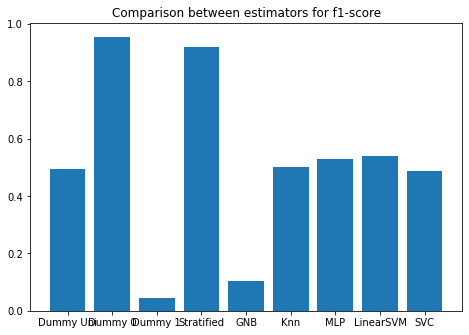

In [ ]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Dummy Uni', 'Dummy 0', 'Dummy 1', 'Stratified', 'GNB', 'Knn', 'MLP', 'LinearSVM', 'SVC']
y1 = [bank_accuracy['uniform (random)'], bank_accuracy['constant 0'], bank_accuracy['constant 1'],bank_accuracy['stratified'], gnb_before[1], knn_before[1], mlp_before[1],svc_linear_before[1], svc_before[1]]
ax.bar(langs,y1)
plt.title("Comparison between estimators for f1-score")
plt.show()

Παρατηρούμε λοιπόν ότι ο dummy 0 αρχικά δίνει το καλύτερο αποτέλεσμα,το οποίο είναι αναμενόμενο. Οι υπόλοιποι εκτιμητές, εκτός από τους υπόλοιπους dummies, δεν είναι σε θέση να εκπαιδευτούν επαρκώς, μάλιστα παρατηρούμε ότι στους mlp και svm δεν φτάνουν καν σε σύγλιση. Αυτό μας δίνει δηλαδή περιθώριο να βελτιώσουμε την ποιότητα των δεδομένων πριν καλέσουμε τους estimators. Στους estimators knn,mlp και svc πηραμε ως μετρική το macro λόγω ανομοιογενούς συνόλο δεδομένων.Επιλάξαμε το macro το οποιο ειναι η μεση τιμη των f1 scores για 0 kai 1.



## Classifier Optimization

Προεπεξεργασία Δεδομένων

---

Αρχικά ελέγξαμε την επίδραση που έχει το preprocessing στην απόδοση των estimators. Ειδικότερα, αρχικά έγινε RandomOverSampling , όμως παρατηρήσαμε το αποτέλεσμα δεν βελτιωνόταν και μεγάλωνε πολύ το train set μας, καθώς είχαμε λίγες τιμές για την κλάση 1 οπότε σχεδόν διπλασιαζόταν το train χωρίς να υπάρχει διαφορετικότητα στις μεταβλητές στην ουσία. Υλοιποιήθηκε για αυτόν το σκοπό ένα manual, στην οποία διατρέχουμε το συνολικό dataset και επιλέγουμε διαφορετικά στοιχεία κλάσης 1 μέχρις ότου γίνουν ίσα με αυτά της 0. Επιτυγχάνουμε έτσι 50-50 balance και τα δεδομένα εμπεριέχουν μεγάλη διαφορετικότητα. 

In [ ]:
data = np.asarray(data_i)

unique, counts = np.unique(y_train, return_counts= True)
print(counts[0], counts[1])
i= 0
while (counts[0]!= counts[1]):
  i = i+1
  if (data[i][-1] == 1.0):
    y_train = np.append(y_train, data[i][-1])
    X_train = np.append(X_train, data[i][:-1])
  unique, counts = np.unique(y_train, return_counts= True)

print(np.unique(y_train, return_counts = True))
#data_sh = shuffle(data)
gamw = int(len(X_train)/64)
print(gamw)
X_train = np.reshape(X_train, (gamw, 64))
print(y_train.shape)

1317 83
(array([0., 1.]), array([1317, 1317]))
2634
(2634,)


In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.5)
train_reduced = selector.fit_transform(X_train)
mask = selector.get_support()
test_reduced = X_test[:,mask]

print(train_reduced.shape)
print(test_reduced.shape)


(2634, 64)
(600, 64)


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

min_max_scaler = preprocessing.StandardScaler()
X_train_minmax = min_max_scaler.fit_transform(train_reduced)
X_test_minmax = min_max_scaler.transform(test_reduced)

In [ ]:
from sklearn.decomposition import PCA
n = 13
pca = PCA(n_components=n)
trainPCA = pca.fit_transform(X_train_minmax)
testPCA = pca.transform(X_test_minmax)
print(X_train_minmax.shape)
print(trainPCA.shape)
print("")
print(X_test_minmax.shape)
print(testPCA.shape)

(2634, 64)
(2634, 13)

(600, 64)
(600, 13)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(trainPCA, y_train.ravel())
pred = knn.predict(testPCA)
print("f1 micro is", f1_score(y_test.ravel(), pred, average = 'micro'))
print("f1 macro is", f1_score(y_test.ravel(), pred, average = 'macro'))


print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

knn_pre = []
knn_pre.append(f1_score(y_test, pred, average='micro'))
knn_pre.append(f1_score(y_test, pred, average = 'macro'))
knn_pre.append(f1_score(y_test, pred, average = 'weighted'))

f1 micro is 0.595
f1 macro is 0.44089732528041414
              precision    recall  f1-score   support

         0.0       0.99      0.59      0.73       574
         1.0       0.08      0.81      0.15        26

    accuracy                           0.59       600
   macro avg       0.53      0.70      0.44       600
weighted avg       0.95      0.59      0.71       600

[[336 238]
 [  5  21]]


In [ ]:
clf = MLPClassifier(solver='adam', alpha=0.001, activation = 'relu', 
                    hidden_layer_sizes=(3,), random_state=1123, learning_rate_init = 0.001, max_iter= 10)
clf.fit(trainPCA, y_train.ravel())
preds = clf.predict(testPCA)
print("F1 score for MLP is :",f1_score(preds, y_test))
print(classification_report(y_test.ravel(), preds))
print(confusion_matrix(y_test, preds))


mlp_pre=[]
mlp_pre.append(f1_score(y_test, preds, average='micro'))
mlp_pre.append(f1_score(y_test, preds, average = 'macro'))
mlp_pre.append(f1_score(y_test, preds, average = 'weighted'))
print(mlp_pre)

F1 score for MLP is : 0.11764705882352941
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       574
         1.0       0.25      0.08      0.12        26

    accuracy                           0.95       600
   macro avg       0.60      0.53      0.55       600
weighted avg       0.93      0.95      0.94       600

[[568   6]
 [ 24   2]]
[0.9500000000000001, 0.5459590354151952, 0.9371506407022498]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
clf = SVC()
clf.fit(trainPCA, y_train.ravel())
preds = clf.predict(testPCA)
print(classification_report(y_test.ravel(), preds))
print(confusion_matrix(y_test, preds))

svc_pre=[]
svc_pre.append(f1_score(y_test, preds, average='micro'))
svc_pre.append(f1_score(y_test, preds, average = 'macro'))
svc_pre.append(f1_score(y_test, preds, average = 'weighted'))
print(svc_pre)

              precision    recall  f1-score   support

         0.0       0.98      0.63      0.77       574
         1.0       0.09      0.77      0.16        26

    accuracy                           0.64       600
   macro avg       0.54      0.70      0.46       600
weighted avg       0.94      0.64      0.74       600

[[364 210]
 [  6  20]]
[0.64, 0.4637182203389831, 0.7445391949152542]


In [ ]:
clf = LinearSVC(random_state=0, max_iter=500)
clf.fit(trainPCA, y_train.ravel())
preds = clf.predict(testPCA)
print(classification_report(y_test.ravel(), preds))
print(confusion_matrix(y_test, preds))

svc_linear_pre=[]
svc_linear_pre.append(f1_score(y_test, preds, average='micro'))
svc_linear_pre.append(f1_score(y_test, preds, average = 'macro'))
svc_linear_pre.append(f1_score(y_test, preds, average = 'weighted'))
print(svc_linear_pre)

              precision    recall  f1-score   support

         0.0       0.98      0.68      0.80       574
         1.0       0.10      0.77      0.17        26

    accuracy                           0.68       600
   macro avg       0.54      0.72      0.49       600
weighted avg       0.95      0.68      0.78       600

[[389 185]
 [  6  20]]
[0.6816666666666666, 0.48802487502177905, 0.7756013027220457]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Plots της προεπεξεργασίας


In [ ]:
def print_plots(a,b,v):
  fig = plt.figure()
  langs = ['Micro', 'Macro', 'Weighted']
  X = np.arange(3)
  ax = fig.add_axes([0,0,1,1])
  ax.bar(X + 0.25, a, color = 'b', width = 0.25,label='Before')
  ax.bar(X + 0.5, b, color = 'r', width = 0.25,label="after")
  plt.xticks(X + 0.75/2 , langs)
  plt.title(v)
  plt.legend()
  plt.show()

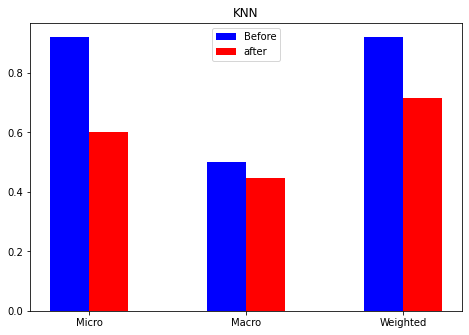

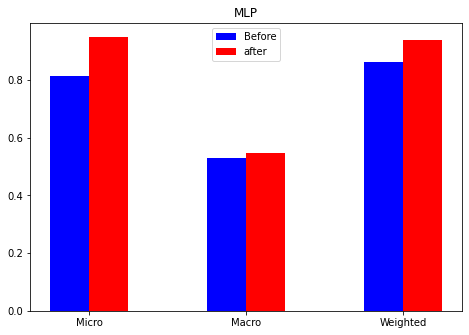

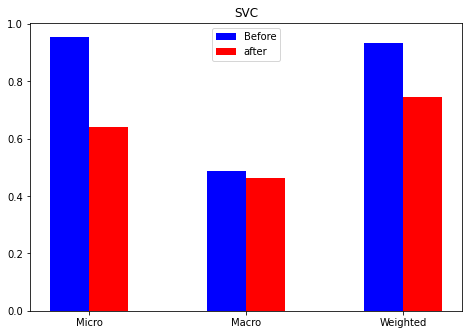

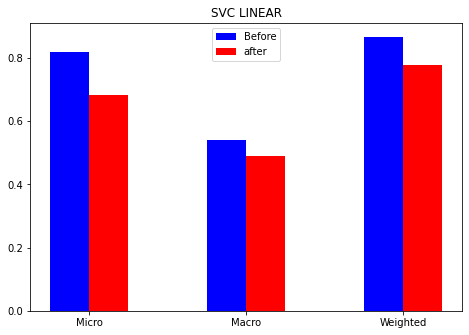

In [ ]:
print_plots(knn_before,knn_pre,"KNN")
print_plots(mlp_before,mlp_pre,"MLP")
print_plots(svc_before,svc_pre,"SVC")
print_plots(svc_linear_before,svc_linear_pre,"SVC LINEAR")

### Grid Search

In [ ]:
selector = VarianceThreshold()
scaler =StandardScaler()
ros = RandomOverSampler()
pca = PCA(n_components = 43)
clf = neighbors.KNeighborsClassifier(n_jobs=-1)
k=[]
for i in range (1,60,3):
  k.append(i)
weights=['uniform', 'distance']
metric=['euclidean','manhattan','chebyshev','minkowski','wminkowski','mahalanobis' ,'seuclidean']
#, ('sampler', ros) meta ton scaler , ,('pca', pca)
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('kNN', clf)],memory = 'tmp')
estimator = GridSearchCV(pipe, dict( kNN__n_neighbors=k, kNN__weights= weights,kNN__metric= metric), cv=5, scoring='f1_macro', n_jobs=-1)
start_time = time.time()
estimator.fit(X_train, y_train)
preds = estimator.predict(X_test)
times = []
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))
print(confusion_matrix(y_test,preds))
print(estimator.best_params_)
knn_after=[] 
knn_after.append(f1_score(y_test, preds, average='micro'))
knn_after.append(f1_score(y_test, preds, average = 'macro'))
knn_after.append(f1_score(y_test, preds, average = 'weighted'))
print(knn_after)

Συνολικός χρόνος fit και predict: 119.73042249679565 seconds
              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86       574
         1.0       0.14      0.88      0.24        26

    accuracy                           0.76       600
   macro avg       0.57      0.82      0.55       600
weighted avg       0.96      0.76      0.83       600

[[435 139]
 [  3  23]]
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 22, 'kNN__weights': 'distance'}
[0.7633333333333333, 0.5521823227651165, 0.8330336669189583]


In [ ]:
selector = VarianceThreshold()
scaler =StandardScaler()
pca = PCA()
mlp = MLPClassifier()


parameter_space ={
    'pca__n_components': [45],
    'mlp__hidden_layer_sizes':[(10,),(20,),(30,)],
    'mlp__activation' : ['identity', 'tanh', 'relu'],
    'mlp__solver' : [ 'sgd', 'adam'],
    'mlp__alpha': [0.05, 0.1, 0,4],
    'mlp__learning_rate' : ['adaptive'],
    'mlp__max_iter' : [500],
}

pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('pca', pca), ('mlp', mlp)],memory = 'tmp')

mlp_estim = GridSearchCV(pipe, parameter_space,  cv=5, scoring='precision', n_jobs=-1)
start_time = time.time()
mlp_estim.fit(X_train, y_train)
preds = mlp_estim.predict(X_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))

print(mlp_estim.best_params_)
print(confusion_matrix(y_test, preds))

mlp_after=[]
mlp_after.append(f1_score(y_test, preds, average='micro'))
mlp_after.append(f1_score(y_test, preds, average = 'macro'))
mlp_after.append(f1_score(y_test, preds, average = 'weighted'))
print(mlp_after)

Συνολικός χρόνος fit και predict: 693.7516448497772 seconds
              precision    recall  f1-score   support

         0.0       0.99      0.76      0.86       574
         1.0       0.15      0.88      0.25        26

    accuracy                           0.77       600
   macro avg       0.57      0.82      0.56       600
weighted avg       0.96      0.77      0.84       600

{'mlp__activation': 'relu', 'mlp__alpha': 0, 'mlp__hidden_layer_sizes': (30,), 'mlp__learning_rate': 'adaptive', 'mlp__max_iter': 500, 'mlp__solver': 'adam', 'pca__n_components': 45}
[[439 135]
 [  3  23]]
[0.7699999999999999, 0.5570866141732285, 0.8375590551181104]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('svc',LinearSVC())])


param_grid = {'svc__C': [30, 49, 50, 55],
              'svc__tol': [0.1, 1],
              'svc__penalty':['l1','l2'],
              'svc__loss': ['squared_hinge','hinge'],
              'svc__max_iter':[5000],
              }
linearSVC = GridSearchCV(SVCpipe,param_grid,cv=5,scoring = 'f1', n_jobs= -1)
start_time = time.time()
linearSVC.fit(X_train,y_train.ravel())
print(linearSVC.best_params_)
preds = linearSVC.predict(X_test)
times.append(time.time() - start_time)
print(classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


svc_linear_after=[]
svc_linear_after.append(f1_score(y_test, preds, average='micro'))
svc_linear_after.append(f1_score(y_test, preds, average = 'macro'))
svc_linear_after.append(f1_score(y_test, preds, average = 'weighted'))
print(svc_linear_after)


{'svc__C': 49, 'svc__loss': 'hinge', 'svc__max_iter': 5000, 'svc__penalty': 'l2', 'svc__tol': 0.1}
              precision    recall  f1-score   support

         0.0       0.99      0.66      0.79       574
         1.0       0.10      0.85      0.18        26

    accuracy                           0.66       600
   macro avg       0.54      0.75      0.48       600
weighted avg       0.95      0.66      0.76       600

[[376 198]
 [  4  22]]
[0.6633333333333333, 0.48356087334458253, 0.7618527040616317]


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
print(X_train.shape) 
param_grid = {'C': [3, 1,8],  
              'gamma': ['scale', 'auto'], 
              'tol': [0.1, 1, 1.3],
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid,scoring='precision', n_jobs = -1) 
start_time = time.time()
grid.fit(X_train, y_train.ravel())
preds = grid.predict(X_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και prdict: %s secoends" % (time.time() - start_time))
print(classification_report(y_test.ravel(), preds))

print(grid.best_params_)
print(confusion_matrix(y_test, preds))

svc_after=[]
svc_after.append(f1_score(y_test, preds, average='micro'))
svc_after.append(f1_score(y_test, preds, average = 'macro'))
svc_after.append(f1_score(y_test, preds, average = 'weighted'))
print(svc_linear_after)

(2634, 64)
Συνολικός χρόνος fit και prdict: 37.67735576629639 secoends
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       574
         1.0       0.88      0.54      0.67        26

    accuracy                           0.98       600
   macro avg       0.93      0.77      0.83       600
weighted avg       0.97      0.98      0.97       600

{'C': 1, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 1}
[[572   2]
 [ 12  14]]
[0.6633333333333333, 0.48356087334458253, 0.7618527040616317]


In [ ]:
SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('svc',SVC())])
param_grid = {'svc__C': [750, 1000, 1500],  
              'svc__gamma': ['scale','auto'],               'svc__tol': [0.1, 1, 0.01] ,
              'svc__kernel': ['poly'],
              'svc__degree':[1, 3, 8]}  


grid = GridSearchCV(SVCpipe, param_grid,scoring='f1', n_jobs= -1) 
start_time = time.time()
grid.fit(X_train, y_train.ravel())
preds = grid.predict(X_test)
times.append(time.time() - start_time)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test, preds))


print(grid.best_params_)
print(confusion_matrix(y_test, preds))


Συνολικός χρόνος fit και predict: 166.6749393939972 seconds
              precision    recall  f1-score   support

         0.0       0.99      0.61      0.75       574
         1.0       0.09      0.88      0.17        26

    accuracy                           0.62       600
   macro avg       0.54      0.75      0.46       600
weighted avg       0.95      0.62      0.73       600

{'svc__C': 1000, 'svc__degree': 1, 'svc__gamma': 'auto', 'svc__kernel': 'poly', 'svc__tol': 1}
[[348 226]
 [  3  23]]


In [ ]:
# defining parameter range

SVCpipe = Pipeline([('scale', StandardScaler()),
                   ('svc',SVC())])
param_grid = {'svc__C': [750, 1000, 1500],  
              'svc__gamma': ['scale','auto'], 
              'svc__tol': [0.1, 1, 0.01] ,
              'svc__kernel': ['poly'],
              'svc__degree':[1, 3, 8]}  

# X_train = preprocessing.scale(X_train)
# X_test = preprocessing.scale(X_test)

grid = GridSearchCV(SVCpipe, param_grid,scoring='f1', n_jobs= -1) 
start_time = time.time()
grid.fit(X_train, y_train.ravel())
preds = grid.predict(X_test)
print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(y_test.ravel(), preds))


print(grid.best_params_)
print(confusion_matrix(y_test, preds))

Συνολικός χρόνος fit και predict: 50.907185077667236 seconds
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       574
         1.0       0.36      0.19      0.25        26

    accuracy                           0.95       600
   macro avg       0.66      0.59      0.61       600
weighted avg       0.94      0.95      0.94       600

{'svc__C': 750, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly', 'svc__tol': 1}
[[565   9]
 [ 21   5]]


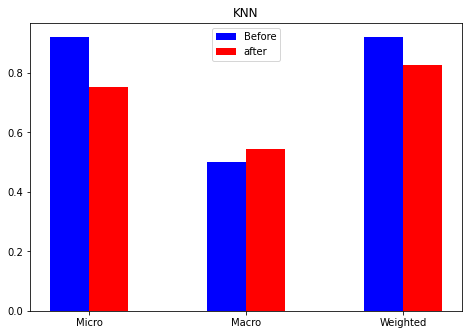

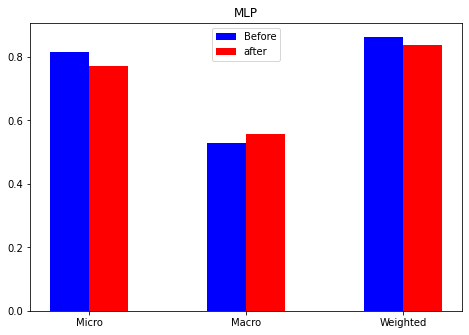

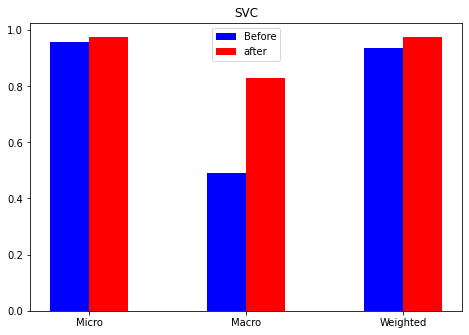

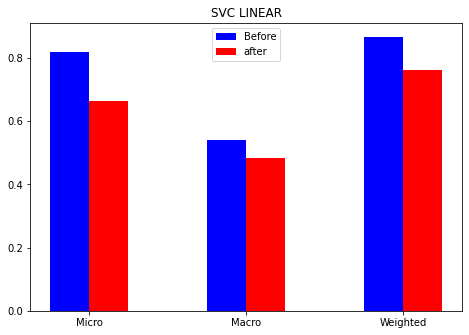

In [ ]:
print_plots(knn_before,knn_after,"KNN")
print_plots(mlp_before,mlp_after,"MLP")
print_plots(svc_before,svc_after,"SVC")
print_plots(svc_linear_before,svc_linear_after,"SVC LINEAR")

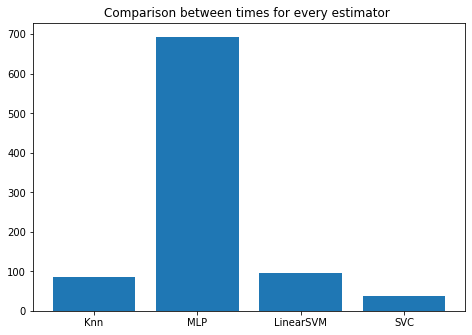

In [ ]:
p=[0.1 ,0.245 , 6.7 , 7.5]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = [ 'Knn', 'MLP', 'LinearSVM', 'SVC']
y1 = times
#y1 = [bank_accuracy['uniform (random)'], bank_accuracy['constant 0'], bank_accuracy['constant 1'],bank_accuracy['stratified'], gnb_before[1], knn_before[1], mlp_before[1],svc_linear_before[1], svc_before[1]]
ax.bar(langs,y1)
plt.title("Comparison between times for every estimator ")
plt.show()

Πραγματοποιήθηκε grid searche σε μεγάλο εύρος υπερπαραμέτρων με σκοπο την βελτιστοποίηση της μετρικής f1 macro λογο της μεγαλης ανομοιογενειας των δεδομενών . Παρατηρουμε πτώση στο accuracy-micro αλλα βελτίωση στο macro, αυτο συμβένει διότι ενώ αρχικά "εκπαιδευόταν" να προβλέπει κυρίως τα 0 και το τrain set ηταν κατα 95% μηδενικα έφτανε σε overfiting επιτυνχανοντας πολυ καλο micro αλλα δεν ειχε την δυνατότητα να προβλέπει τους ασσους( 7-10% accuracy ασσους). Μετά το prepoccessing και το gridsearch το μοντέλο μαθαίνει καλύτερα να προβλέπει τους άσσους αλλα μικραίνει το accuracy στα μηδενικα, με αποτέλεσμα να έχουμε χειρότερο micro και καλύτερο macro.


Γενικά, αν θεωρείται πιο επικίνδυνη η πτώχευση μιας εταιρείας από τη μη πτώχευση, καλύτερο θα ήταν να κοιτάμε μόνο τους άσσους και να μεγιστοπούμε το accuracy στην προβλεψή τους, αψηφώντας τα μηδενικά. Έτσι ίσως να φτάναμε σε "ακραία κινδυνολογία" δηλαδή θα προβλέπαμε πτώχευση και σε "ασφαλείς" επιχειρήσεις.  